<a href="https://colab.research.google.com/github/LinearAlgeb/6070-Practical-Programming/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic

## Set Up -- Jiuling

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[Color palette](https://colorswall.com/palette/5387):

Yellow #f4be1e

Light Yellow #f4d46c

Blue1 #a2cccc

Blue2 #5ca4b0

Blue3 #065e75

Blue4 #293b4a

##Web-Scraping -- Wenjin

Scraping passengers' hometown to a new dataset

In [ ]:
wiki1 = pd.read_html('https://en.wikipedia.org/w/index.php?title=Passengers_of_the_RMS_Titanic&oldid=883859055', header=0)[0]
wiki2 = pd.read_html('https://en.wikipedia.org/w/index.php?title=Passengers_of_the_RMS_Titanic&oldid=883859055', header=0)[1]
wiki3 = pd.read_html('https://en.wikipedia.org/w/index.php?title=Passengers_of_the_RMS_Titanic&oldid=883859055', header=0)[2]

In [ ]:
wiki1.head()

,Name,Age,Hometown,Boarded,Destination,Lifeboat,Body
0,"Allen, Miss Elizabeth Walton",29,"St Louis, Missouri, US",Southampton,"St Louis, Missouri, US",2,NaN
1,"Allison, Mr. Hudson Joshua Creighton",30,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,135MB
2,"and chauffeur, Mr. George Swane[59]",19,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,294MB
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[59]",18,"London, England, UK",Southampton,"Montreal, Quebec, Canada",11,NaN
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,NaN


In [ ]:
wiki2.head()

,Name,Age,Hometown,Boarded,Destination,Lifeboat,Body
0,"Abelson, Mr. Samuel",30,Russia,Cherbourg,"New York, New York, US",NaN,NaN
1,"Abelson, Mrs. Anna (née Wizosky?)",28,Russia,Cherbourg,"New York, New York, US",10,NaN
2,"Andrew, Mr. Edgar Samuel",17,"San Ambrosio, Córdoba, Argentina",Southampton,"Trenton, New Jersey, US",NaN,NaN
3,"Andrew, Mr. Frank Thomas",30,"Redruth, Cornwall, England",Southampton,"Houghton, Michigan, US",NaN,NaN
4,"Angle, Mr. William A.",32,"Warwick, Warwickshire, England",Southampton,New York City,NaN,NaN


In [ ]:
wiki3.head()

,Name,Age,Hometown,Home country,Boarded,Destination,Lifeboat,Body
0,"Abbing, Mr. Anthony",40,"Cincinnati, Ohio",US,Southampton,"Cincinnati, Ohio, US",NaN,NaN
1,"Abbott, Mrs. Rhoda Mary (née Hunt)",39,"East Providence, Rhode Island",US,Southampton,"East Providence, Rhode Island, US",A,NaN
2,"Abbott, Mr. Rossmore Edward",16,"East Providence, Rhode Island",US,Southampton,"East Providence, Rhode Island, US",NaN,NaN
3,"Abbott, Mr. Eugene Joseph",14,"East Providence, Rhode Island",US,Southampton,"East Providence, Rhode Island, US",NaN,NaN
4,"Abd al-Khaliq, Mr. Farid Qasim Husayn",18,Shana,Lebanon,Cherbourg,New York City,NaN,NaN


In [ ]:
wiki1['Pclass'] = 1
wiki2['Pclass'] = 2

In [ ]:
wiki3['Hometown'] = wiki3['Hometown'] + ', ' + wiki3['Home country']
wiki3 = wiki3.drop('Home country', axis=1, errors='ignore')

wiki3['Pclass'] = 3

In [ ]:
wiki = pd.concat([wiki1, wiki2, wiki3], ignore_index=True)
wiki

,Name,Age,Hometown,Boarded,Destination,Lifeboat,Body,Pclass
0,"Allen, Miss Elizabeth Walton",29,"St Louis, Missouri, US",Southampton,"St Louis, Missouri, US",2,NaN,1
1,"Allison, Mr. Hudson Joshua Creighton",30,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,135MB,1
2,"and chauffeur, Mr. George Swane[59]",19,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,294MB,1
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[59]",18,"London, England, UK",Southampton,"Montreal, Quebec, Canada",11,NaN,1
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,NaN,1
...,...,...,...,...,...,...,...,...
1309,"Youssef, Mr. Gerios (Sam'aan)",45,"Hardîne, Lebanon",Cherbourg,"Wilkes-Barre, Pennsylvania, US",NaN,NaN,3
1310,"Zajib Qiyamah, Miss Adal ""Jane""",15,"El Shweir, Lebanon",Cherbourg,"Brooklyn, New York, US",C,NaN,3
1311,"Zakarian, Mr. Haroutyun Der",27,"Kiğı, Turkey",Cherbourg,"Brantford, Ontario, Canada",NaN,NaN,3
1312,"Zakarian, Mr. Mapri Der",22,"Kiğı, Turkey",Cherbourg,"Brantford, Ontario, Canada",NaN,304MB,3


## World Map -- Together

In [ ]:
wiki = wiki[['Name','Hometown']]
wiki.sort_values(by=['Name'],ascending=True)

,Name,Hometown
607,"Abbing, Mr. Anthony","Cincinnati, Ohio, US"
610,"Abbott, Mr. Eugene Joseph","East Providence, Rhode Island, US"
609,"Abbott, Mr. Rossmore Edward","East Providence, Rhode Island, US"
608,"Abbott, Mrs. Rhoda Mary (née Hunt)","East Providence, Rhode Island, US"
611,"Abd al-Khaliq, Mr. Farid Qasim Husayn","Shana, Lebanon"
...,...,...
1107,NaN,"Bjuv, Skåne, Sweden"
1168,NaN,"Skaun, Sør-Trøndelag, Norway"
1224,NaN,NaN
1259,NaN,"Unknown, Germany"


In [ ]:
wiki.dtypes

Name        object
Hometown    object
dtype: object

In [ ]:
wiki[['city','H1']] = wiki['Hometown'].str.split(',', 1, expand=True)
wiki[['state','H2']] = wiki['H1'].str.split(',', 1, expand=True)
wiki[['province','country']] = wiki['H2'].str.split(',', 1, expand=True)
wiki

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Name,Hometown,city,H1,state,H2,province,country
0,"Allen, Miss Elizabeth Walton","St Louis, Missouri, US",St Louis,"Missouri, US",Missouri,US,US,None
1,"Allison, Mr. Hudson Joshua Creighton","Montreal, Quebec, Canada",Montreal,"Quebec, Canada",Quebec,Canada,Canada,None
2,"and chauffeur, Mr. George Swane[59]","Montreal, Quebec, Canada",Montreal,"Quebec, Canada",Quebec,Canada,Canada,None
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[59]","London, England, UK",London,"England, UK",England,UK,UK,None
4,"Allison, Mrs. Bessie Waldo (née Daniels)","Montreal, Quebec, Canada",Montreal,"Quebec, Canada",Quebec,Canada,Canada,None
...,...,...,...,...,...,...,...,...
1309,"Youssef, Mr. Gerios (Sam'aan)","Hardîne, Lebanon",Hardîne,Lebanon,Lebanon,None,None,None
1310,"Zajib Qiyamah, Miss Adal ""Jane""","El Shweir, Lebanon",El Shweir,Lebanon,Lebanon,None,None,None
1311,"Zakarian, Mr. Haroutyun Der","Kiğı, Turkey",Kiğı,Turkey,Turkey,None,None,None
1312,"Zakarian, Mr. Mapri Der","Kiğı, Turkey",Kiğı,Turkey,Turkey,None,None,None


In [ ]:
wiki['H2'] = wiki['H2'].fillna(wiki.pop('state'))
wiki['province'] = wiki['province'].fillna(wiki.pop('H2'))
wiki['country'] = wiki['country'].fillna(wiki.pop('province'))
wiki

,Name,Hometown,city,H1,country
0,"Allen, Miss Elizabeth Walton","St Louis, Missouri, US",St Louis,"Missouri, US",US
1,"Allison, Mr. Hudson Joshua Creighton","Montreal, Quebec, Canada",Montreal,"Quebec, Canada",Canada
2,"and chauffeur, Mr. George Swane[59]","Montreal, Quebec, Canada",Montreal,"Quebec, Canada",Canada
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[59]","London, England, UK",London,"England, UK",UK
4,"Allison, Mrs. Bessie Waldo (née Daniels)","Montreal, Quebec, Canada",Montreal,"Quebec, Canada",Canada
...,...,...,...,...,...
1309,"Youssef, Mr. Gerios (Sam'aan)","Hardîne, Lebanon",Hardîne,Lebanon,Lebanon
1310,"Zajib Qiyamah, Miss Adal ""Jane""","El Shweir, Lebanon",El Shweir,Lebanon,Lebanon
1311,"Zakarian, Mr. Haroutyun Der","Kiğı, Turkey",Kiğı,Turkey,Turkey
1312,"Zakarian, Mr. Mapri Der","Kiğı, Turkey",Kiğı,Turkey,Turkey


In [ ]:
#calculate the population who share the same home country
w2 = pd.DataFrame(wiki['country'].value_counts().reset_index())
w2.columns = ['country', '#ofpassengers']
print(w2.shape)
print(w2.dtypes)
w2
#pay attention to ['country'] with [note #], e.g.German Empire, Ottoman Empire, etc.
#and also [England, Ireland, UK, etc.]
#Manual work needed

(65, 2)
country          object
#ofpassengers     int64
dtype: object


,country,#ofpassengers
0,US,291
1,England,265
2,Ireland,113
3,Sweden,80
4,UK,66
...,...,...
60,Mexico,1
61,British India[note 3],1
62,Bolivia,1
63,Ottoman Empire,1


In [ ]:
#w2.to_csv('/content/drive/MyDrive/Final_Project/w2.csv')

In [ ]:
# after manual work done on w2.csv, reload
w3 = pd.read_csv('/content/drive/MyDrive/Final_Project/w2.csv')
w3 = w3[['Country','#ofpassengers']]
w3

,Country,#ofpassengers
0,Argentina,6
1,Australia,2
2,Austria,1
3,Belarus,1
4,Belgium,22
5,Bolivia,1
6,Bosnia and Herz.,4
7,Bulgaria,33
8,Canada,41
9,China,8


In [ ]:
#Hometown World Map
!pip install geojson
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gp
import geojson as gpd

In [ ]:
worldmap = gp.read_file('/content/drive/MyDrive/Final_Project/world.geojson')
worldmap.head(3)

,NAME,NAME_LONG,ADM0_A3,ISO_A2,ISO_A3,WB_A2,WB_A3,geometry
0,Afghanistan,Afghanistan,AFG,AF,AFG,AF,AFG,"POLYGON ((74.89230 37.23110, 74.48730 37.22590..."
1,Angola,Angola,AGO,AO,AGO,AO,AGO,"MULTIPOLYGON (((23.96750 -10.87230, 24.01120 -..."
2,Albania,Albania,ALB,AL,ALB,AL,ALB,"POLYGON ((20.06500 42.54680, 20.24960 42.31860..."


In [ ]:
worldmap.rename(columns={'NAME': 'Country','NAME_LONG': 'Country_long'}, inplace=True)
worldmap

,Country,Country_long,ADM0_A3,ISO_A2,ISO_A3,WB_A2,WB_A3,geometry
0,Afghanistan,Afghanistan,AFG,AF,AFG,AF,AFG,"POLYGON ((74.89230 37.23110, 74.48730 37.22590..."
1,Angola,Angola,AGO,AO,AGO,AO,AGO,"MULTIPOLYGON (((23.96750 -10.87230, 24.01120 -..."
2,Albania,Albania,ALB,AL,ALB,AL,ALB,"POLYGON ((20.06500 42.54680, 20.24960 42.31860..."
3,Aland,Aland Islands,ALD,AX,ALA,-99,-99,"POLYGON ((19.91850 60.37020, 20.27760 60.27870..."
4,Andorra,Andorra,AND,AD,AND,AD,ADO,"POLYGON ((1.70700 42.50280, 1.44790 42.43460, ..."
...,...,...,...,...,...,...,...,...
194,Zambia,Zambia,ZMB,ZM,ZMB,ZM,ZMB,"POLYGON ((32.92090 -9.40790, 32.97470 -9.60130..."
195,Zimbabwe,Zimbabwe,ZWE,ZW,ZWE,ZW,ZWE,"POLYGON ((30.39630 -15.63600, 30.40260 -16.001..."
196,Vatican,Vatican City,VAT,VA,VAT,VA,VAT,"POLYGON ((12.45832 41.90260, 12.45835 41.90154..."
197,San Marino,San Marino,SMR,SM,SMR,SM,SMR,"POLYGON ((12.44146 43.87457, 12.47505 43.89909..."


In [ ]:
w = worldmap.merge(w3, on='Country')
print(w.shape)
w
# Pay attention to 'Unknown' and 'Monaco'.
# Monaco not found in geojson.

(43, 9)


,Country,Country_long,ADM0_A3,ISO_A2,ISO_A3,WB_A2,WB_A3,geometry,#ofpassengers
0,Argentina,Argentina,ARG,AR,ARG,AR,ARG,"MULTIPOLYGON (((-64.34060 -54.71600, -64.60720...",6
1,Australia,Australia,AUS,AU,AUS,AU,AUS,"MULTIPOLYGON (((144.76630 -40.72650, 144.98470...",2
2,Austria,Austria,AUT,AT,AUT,AT,AUT,"POLYGON ((16.94500 48.60420, 16.84450 48.36560...",1
3,Belgium,Belgium,BEL,BE,BEL,BE,BEL,"POLYGON ((5.99490 50.74990, 6.23290 50.58710, ...",22
4,Bulgaria,Bulgaria,BGR,BG,BGR,BG,BGR,"POLYGON ((28.57840 43.74130, 28.60350 43.53820...",33
5,Bosnia and Herz.,Bosnia and Herzegovina,BIH,BA,BIH,BA,BIH,"POLYGON ((19.01580 44.86560, 19.17430 44.92540...",4
6,Belarus,Belarus,BLR,BY,BLR,BY,BLR,"POLYGON ((28.14890 56.14240, 28.28980 56.04660...",1
7,Bolivia,Bolivia,BOL,BO,BOL,BO,BOL,"POLYGON ((-58.15880 -20.16510, -58.17530 -19.8...",1
8,Canada,Canada,CAN,CA,CAN,CA,CAN,"MULTIPOLYGON (((-60.50110 47.00120, -60.31080 ...",41
9,Switzerland,Switzerland,CHE,CH,CHE,CH,CHE,"POLYGON ((9.54750 47.53450, 9.64950 47.40970, ...",12


In [ ]:
#w.plot(column = '#ofpassengers', figsize = (32,25), cmap='Blues', edgecolor='0.8')
#w['coords'] = w['geometry'].apply(lambda x: x.representative_point().coords[:])
#w['coords'] = [coords[0] for coords in w['coords']]
#import matplotlib.pyplot as plt
#for idx, row in w.iterrows():
#    plt.annotate(s=row['ADM0_A3'], xy=row['coords'],
#                 horizontalalignment='center')
#plt.title('Hometown of Passengers', fontsize = 24)

Text(0.5, 1.0, 'Hometown of Passengers')

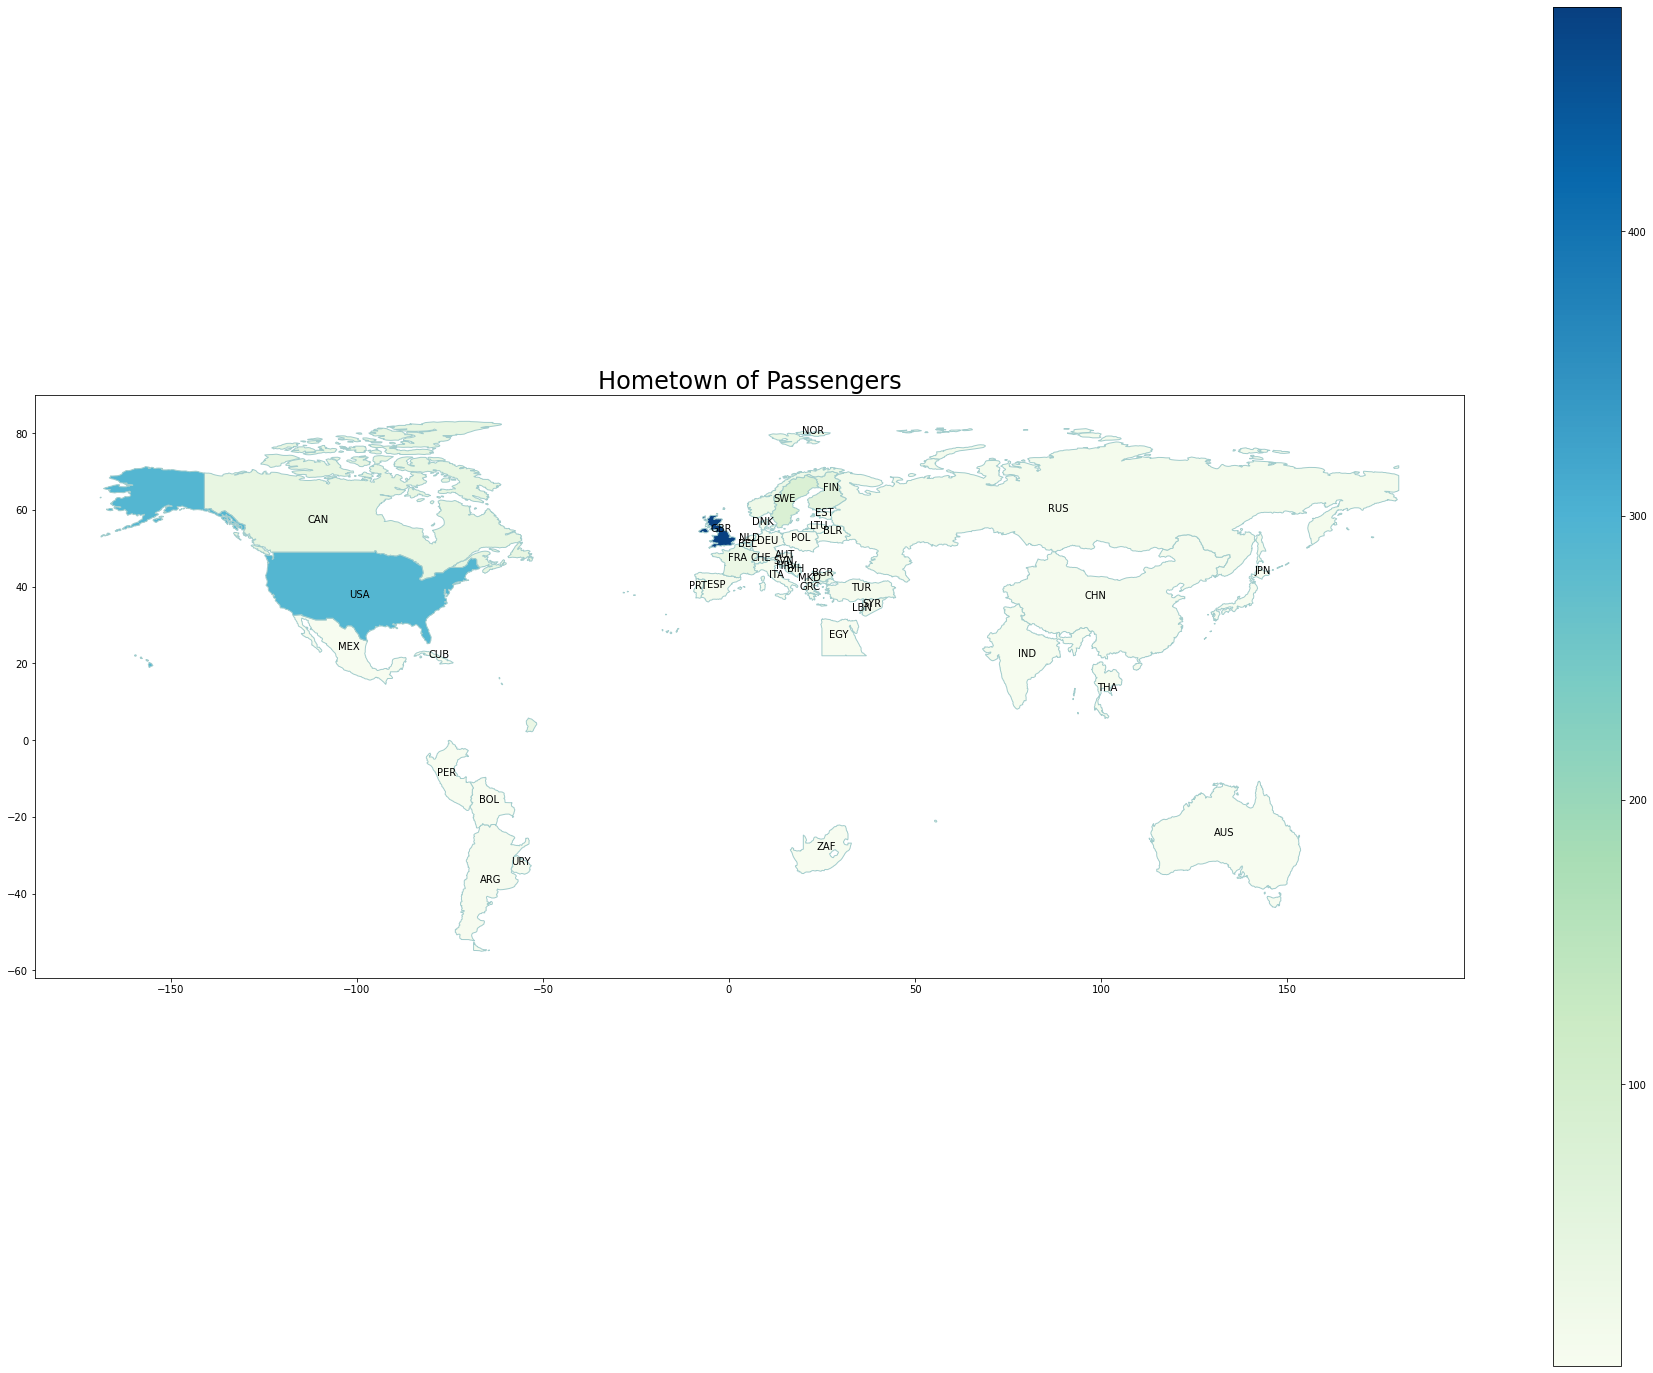

In [ ]:
dfig, ax = plt.subplots(1, 1, figsize = (32,25))
w['coords'] = w['geometry'].apply(lambda x: x.representative_point().coords[:])
w['coords'] = [coords[0] for coords in w['coords']]
w.plot(column='#ofpassengers', ax=ax, edgecolor='#a2cccc', cmap='GnBu', legend = True)
for idx, row in w.iterrows():
    plt.annotate(s=row['ADM0_A3'], xy=row['coords'],
                 horizontalalignment='center')
plt.title('Hometown of Passengers', fontsize = 24)

## Load train and test dataset -- Jiuling

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Final_Project/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Final_Project/test.csv')
#ti = pd.concat([train,test])
#ti

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis -- Together

###Descriptive Analyses -- Wenjin

#### Descriptive Statistics

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train[['Age','SibSp', 'Parch', 'Fare']].describe().round(3)

,Age,SibSp,Parch,Fare
count,714.000,891.000,891.000,891.000
mean,29.699,0.523,0.382,32.204
std,14.526,1.103,0.806,49.693
min,0.420,0.000,0.000,0.000
25%,20.125,0.000,0.000,7.910
50%,28.000,0.000,0.000,14.454
75%,38.000,1.000,0.000,31.000
max,80.000,8.000,6.000,512.329


In [ ]:
train['SexQ'] = train['Sex'].map( {'male': 0, 'female': 1} ).astype(int)

#### Correlation

Text(0.5, 1.0, 'Correlations')

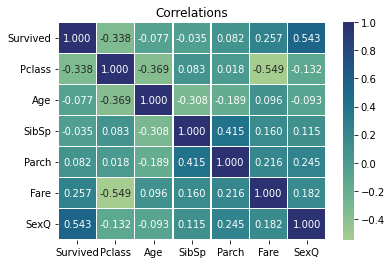

In [ ]:
ax = sns.heatmap(train[['Survived','Pclass','Age','SibSp','Parch','Fare','SexQ']].corr(), annot=True, fmt=".3f", linewidth=.3, cmap="crest")
plt.title('Correlations')
#like this color scheme, it goes well with our theme:)

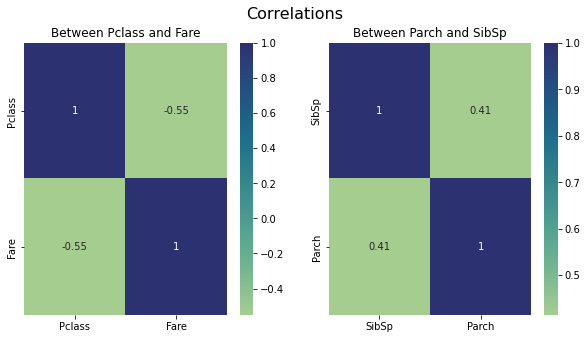

In [ ]:
#ZOOM IN
#Based on the general heatmap, spotted correlation between 'Pclass'and'Fare'; 'SibSp'and'Parch'.
fig, axes = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('Correlations', fontsize = 16)
axes[0].set_title('Between Pclass and Fare')
axes[1].set_title('Between Parch and SibSp')

sns.heatmap(train[['Pclass','Fare']].corr(), annot=True, ax=axes[0], cmap="crest")
sns.heatmap(train[['SibSp','Parch']].corr(), annot=True, ax=axes[1], cmap="crest")

#### Distribution

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7995cad8b0>],
      dtype=object)

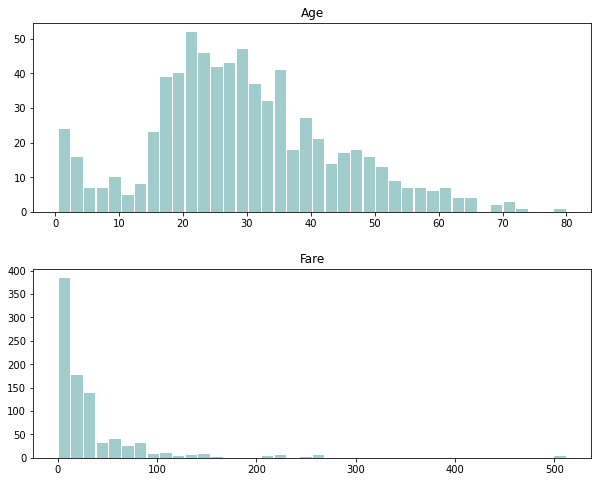

In [ ]:
fig, axes = plt.subplots(2, 1, figsize = (10,8))
train.hist(column='Age', bins=40, grid=False, figsize=(8,4), color='#a2cccc', rwidth=0.9, ax=axes[0]) 
train.hist(column='Fare', bins=40, grid=False, figsize=(8,4), color='#a2cccc', rwidth=0.9, ax=axes[1]) 

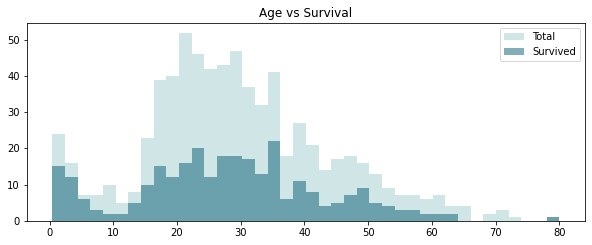

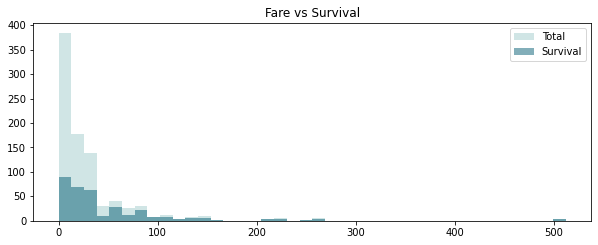

In [ ]:
survived = train[train.Survived == 1]

#plot1
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(train.Age, alpha=0.5, bins=40, color='#a2cccc')
plt.hist(survived.Age, alpha=0.5, bins=40, color='#065e75')
plt.legend(["Total","Survived"], loc="best")
plt.title('Age vs Survival')
plt.show()

#plot2
plt.figure(figsize=(10,8))
plt.subplot(2,1,2)
plt.hist(train.Fare, alpha=0.5, bins=40, color='#a2cccc')
plt.hist(survived.Fare, alpha=0.5, bins=40, color='#065e75')
plt.legend(["Total","Survival"], loc="best")
plt.title('Fare vs Survival')
plt.show()

### Groupby -- Analysis: Jiuling, Visualization: Wenjin

In [ ]:
# 1. Was age a factor in determining the chances of survival?
## coding age to catogorical variable
train['AgeC'] = pd.cut(train['Age'],
                      bins=[0, 2, 10, 18, 55, float('Inf')],
                      labels=['Baby', 'Child', 'Adolescent','Adult','Elder'])

train.groupby(['AgeC'])[['Survived']].sum()

,Survived
AgeC,
Baby,15
Child,23
Adolescent,32
Adult,208
Elder,12


In [ ]:
train.groupby(['AgeC'])[['Survived']].sum()/train.groupby(['AgeC'])[['Survived']].count()

,Survived
AgeC,
Baby,0.625000
Child,0.575000
Adolescent,0.426667
Adult,0.388785
Elder,0.300000


In [ ]:
535/714

0.7492997198879552

In [ ]:
train['AgeC'] = train['AgeC'].astype(object)
survived = train[train.Survived == 1]
survived['AgeC'] = survived['AgeC'].astype(object)

<ipython-input-294-36d5f5787db0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived['AgeC'] = survived['AgeC'].astype(object)


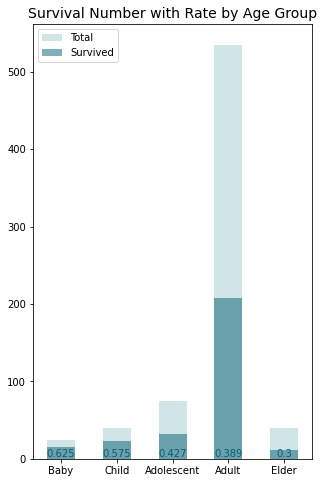

In [ ]:
plt.figure(figsize=(5,8))

train.AgeC.value_counts().loc[['Baby', 'Child', 'Adolescent','Adult','Elder']].plot.bar(alpha=0.5, color='#a2cccc')
survived.AgeC.value_counts().loc[['Baby', 'Child', 'Adolescent','Adult','Elder']].plot.bar(alpha=0.5, color='#065e75')
plt.xticks(rotation = 'horizontal')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center',va = 'bottom',color='#065e75')

bars = [0.625,0.575,0.427,0.389,0.300]
labels = ['Baby', 'Child', 'Adolescent','Adult','Elder']
addlabels(labels,bars)
plt.title('Survival Number with Rate by Age Group', fontsize=14) 
plt.legend(["Total","Survived"], loc="best")
plt.show()

In [ ]:
# 2. Did women have a better survival rate than men? [male=0, female=1]
train.groupby(['Sex'])[['Survived']].sum()/train.groupby(['Sex'])[['Survived']].count()

,Survived
Sex,
female,0.742038
male,0.188908


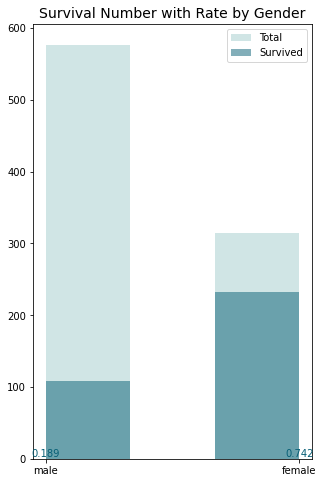

In [ ]:
plt.figure(figsize=(5,8))
plt.hist(train.Sex, alpha=0.5, bins=3, color='#a2cccc')
plt.hist(survived.Sex, alpha=0.5, bins=3, color='#065e75')
plt.legend(["Total","Survived"], loc="best")

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center',va = 'bottom',color='#065e75')

bars = [0.189,0.742]
labels = ['Male','Female']
addlabels(labels,bars)
plt.title('Survival Number with Rate by Gender', fontsize=14) 
plt.show()

In [ ]:
# 3. Consider both sex and age
df = (train.groupby(['AgeC','Sex'])[['Survived']].sum()/train.groupby(['AgeC','Sex'])[['Survived']].count()).unstack()
df

Survived          
Sex           female      male
AgeC                          
Adolescent  0.729730  0.131579
Adult       0.777174  0.185185
Baby        0.600000  0.642857
Child       0.619048  0.526316
Elder       0.888889  0.129032

In [ ]:
train.groupby(['AgeC','Sex'])['Survived'].sum().unstack()

Sex,female,male
AgeC,,
Adolescent,27,5
Adult,143,65
Baby,6,9
Child,13,10
Elder,8,4


Text(0.5, 1.0, 'Survival Rate by Age and Gender')

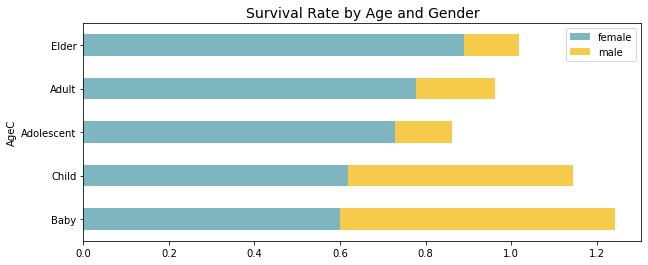

In [ ]:
df.loc[['Baby', 'Child', 'Adolescent','Adult','Elder']].plot.barh(stacked = True, figsize=(10,4), color = ['#5ca4b0','#f4be1e'], alpha=0.8)
plt.xticks(rotation = 'horizontal')
plt.legend(['female','male'])
plt.title('Survival Rate by Age and Gender', fontsize=14) 

In [ ]:
# 4. Did passengers with family have a better survival rate than those without?
train['family'] = train['Parch'] + train['SibSp']

In [ ]:
train['family'] = np.where(train['family'] == 0, 'without family', 'with family')
survived = train[train.Survived == 1]

In [ ]:
#train.groupby(['family'])['Survived'].sum()/
train.groupby(['family'])['Survived'].count()

family
with family       354
without family    537
Name: Survived, dtype: int64

In [ ]:
train.groupby(['AgeC','family'])['Survived'].sum().unstack()

family,with family,without family
AgeC,,
Adolescent,20.0,12.0
Adult,98.0,110.0
Baby,15.0,NaN
Child,22.0,1.0
Elder,5.0,7.0


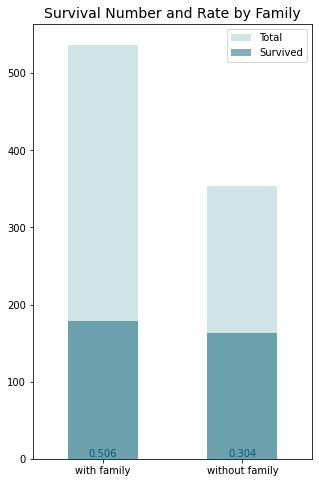

In [ ]:
plt.figure(figsize=(5,8))

train.family.value_counts().plot.bar(alpha=0.5, color='#a2cccc')
survived.family.value_counts().plot.bar(alpha=0.5, color='#065e75')
plt.xticks(rotation = 'horizontal')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center',va = 'bottom',color='#065e75')

bars = [0.506,0.304]
labels = ['without family','with family']
addlabels(labels,bars)

plt.title('Survival Number and Rate by Family', fontsize=14) 
plt.legend(["Total","Survived"], loc="best")
plt.xticks
plt.show()

In [ ]:
#(train.groupby(['family','AgeC'])[['Survived']].sum()/
dff = (train.groupby(['AgeC','family'])['Survived'].sum()/train.groupby(['AgeC','family'])['Survived'].count()).unstack()
dff

family,with family,without family
AgeC,,
Adolescent,0.500000,0.342857
Adult,0.497462,0.325444
Baby,0.625000,NaN
Child,0.564103,1.000000
Elder,0.500000,0.233333


Text(0.5, 1.0, 'Survival Rate by Age and Family member')

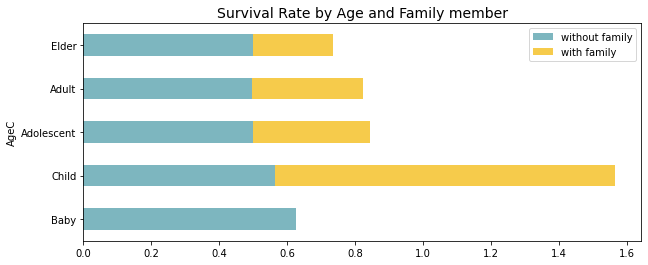

In [ ]:
dff.loc[['Baby', 'Child', 'Adolescent','Adult','Elder']].plot.barh(stacked = True, figsize=(10,4), color = ['#5ca4b0','#f4be1e'], alpha=0.8)
plt.xticks(rotation = 'horizontal')
plt.legend(['without family','with family'])
plt.title('Survival Rate by Age and Family member', fontsize=14)

In [ ]:
# 5. Was passenger class a facter in determining the survival rate?
train.groupby(['Pclass'])[['Fare']].mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [ ]:
train.groupby(['AgeC','Pclass'])['Pclass'].count()

AgeC        Pclass
Adolescent  1          13
            2          12
            3          50
Adult       1         144
            2         137
            3         254
Baby        1           2
            2           7
            3          15
Child       1           1
            2          10
            3          29
Elder       1          26
            2           7
            3           7
Name: Pclass, dtype: int64

In [ ]:
train.groupby(['Pclass'])[['Survived']].sum()

,Survived
Pclass,
1,136
2,87
3,119


In [ ]:
dfclass = train.groupby(['Pclass'])[['Survived']].sum()/train.groupby(['Pclass'])[['Survived']].count()
dfclass

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


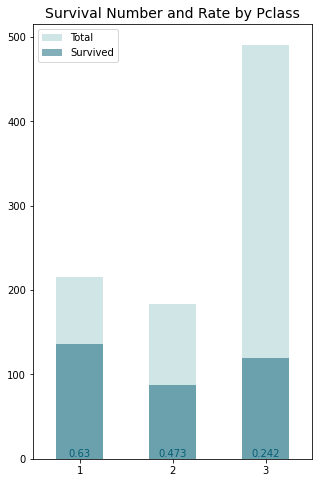

In [ ]:
plt.figure(figsize=(5,8))

train.Pclass.value_counts().loc[[1,2,3]].plot.bar(alpha=0.5, color='#a2cccc')
survived.Pclass.value_counts().loc[[1,2,3]].plot.bar(alpha=0.5, color='#065e75')
plt.xticks(rotation = 'horizontal')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center',va = 'bottom',color='#065e75')

bars = [0.630,0.473,0.242]
labels = ['First','Second','Third']
addlabels(labels,bars)
plt.title('Survival Number and Rate by Pclass', fontsize=14) 
plt.legend(["Total","Survived"], loc="best")
plt.show()

In [ ]:
# 6. Was embarked station and passenger class relevant to the survival rate?
train.groupby(['Embarked'])[['Survived']].sum()/train.groupby(['Embarked'])[['Survived']].count()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [ ]:
train.groupby(['Pclass','Embarked'])['Fare'].mean().unstack()

Embarked,C,Q,S
Pclass,,,
1,104.718529,90.000000,70.364862
2,25.358335,12.350000,20.327439
3,11.214083,11.183393,14.644083


In [ ]:
(train.groupby(['Pclass','Embarked'])['Survived'].sum()/train.groupby(['Pclass','Embarked'])['Survived'].count()).unstack()

Embarked,C,Q,S
Pclass,,,
1,0.694118,0.500000,0.582677
2,0.529412,0.666667,0.463415
3,0.378788,0.375000,0.189802


Text(0.5, 1.0, 'Ticket Count Number and Survival Rate on Pclass and Embarked')

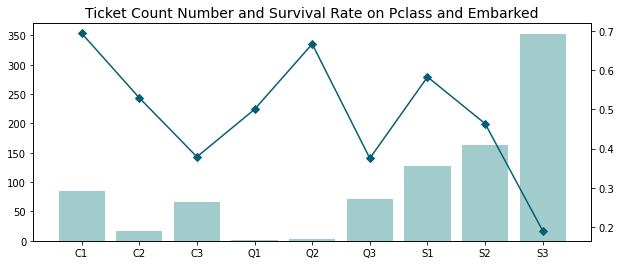

In [ ]:
fig, ax1 = plt.subplots(figsize = (10,4))

xaxis = ['C1','C2','C3',
         'Q1','Q2','Q3',
         'S1','S2','S3']

ax2 = ax1.twinx()
df1 = train.groupby(['Embarked','Pclass'])['Fare'].count().to_frame()
ax1.bar(xaxis, df1.Fare, color = '#a2cccc')

df2 = (train.groupby(['Embarked','Pclass'])['Survived'].sum()/train.groupby(['Embarked','Pclass'])['Survived'].count()).to_frame()
ax2.plot(xaxis, df2.Survived, color = '#065e75', marker='D')

plt.title('Ticket Count Number and Survival Rate on Pclass and Embarked', fontsize = 14)

##Preprocessing -- Together

###train dataset

####Missing Value -- Wenjin

In [ ]:
print("The number of missing values for each column is shown below:\n")
print(train.isnull().sum())

The number of missing values for each column is shown below:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
SexQ             0
AgeC           177
family           0
dtype: int64


Based on the right skewed distribution of Age, we can impute missing values by median or mode

As 'Embarked' is a categorical variable, we can impute missing values by mode

Thereby we choose to apply 'mode'

In [ ]:
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputer on Age and Embarked columns
impute_columns = ['Age', 'Embarked']
train[impute_columns] = mode_imputer.fit_transform(train[impute_columns])

In [ ]:
print("\nThe number of missing values for each column after imputation is shown below:\n")
print(train.isnull().sum())


The number of missing values for each column after imputation is shown below:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
SexQ             0
AgeC           177
family           0
dtype: int64


####Outliers -- Jiuling

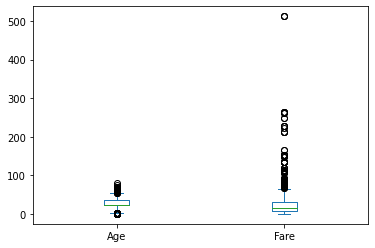

In [ ]:
train[['Age','Fare']].plot.box()

In [ ]:
#We found that Joseph Bruce Ismay, the owner of Titanic, and his servant went broad with complimentary tickets (0 pounds).
#We also found Charlotte Drake Cardeza and her son bought the most expensive tickets on Titanic (at 512 pounds). 
#So we decide to drop these outliers.
train1 = train.loc[(train['Fare'] < 512) & (train['Fare'] > 0)]

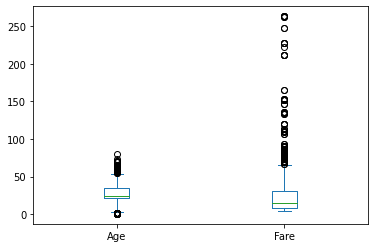

In [ ]:
train1[['Age','Fare']].plot.box()
#It looks much better now. 
#We chose not to drop the other outliers because luxurious suites can be very expensive and there were many babies and the elder. 
#In other words, they bear realistic meanings so we decide to keep them.

#### Scaling -- Wenjin

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
train[['Age', 'Fare']] = scaler.fit_transform(train[['Age', 'Fare']])

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexQ,AgeC,family
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.014151,NaN,S,0,Adult,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.139136,C85,C,1,Adult,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.015469,NaN,S,1,Adult,without family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.103644,C123,S,1,Adult,with family
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.015713,NaN,S,0,Adult,without family


####Get ready for model building -- Wenjin

In [ ]:
X = train1.copy()
X = X[['SexQ','SibSp', 'Fare', 'Parch', 'Pclass', 'Age']]

In [ ]:
X.dtypes

SexQ        int64
SibSp       int64
Fare      float64
Parch       int64
Pclass      int64
Age        object
dtype: object

In [ ]:
X['Age'] = X['Age'].astype(int)

In [ ]:
Embarked = pd.get_dummies(train.Embarked)
X = X.join(Embarked)
X.head()

,SexQ,SibSp,Fare,Parch,Pclass,Age,C,Q,S
0,0,1,7.2500,0,3,22,0,0,1
1,1,1,71.2833,0,1,38,1,0,0
2,1,0,7.9250,0,3,26,0,0,1
3,1,1,53.1000,0,1,35,0,0,1
4,0,0,8.0500,0,3,35,0,0,1


In [ ]:
# Isolate Survived from train data
y = train1['Survived']

###test dataset -- Wenjin

In [ ]:
# Repeat the same process
print("The number of missing values for each column is shown below:\n")
print(test.isnull().sum())

test['SexQ'] = test['Sex'].map( {'male': 0, 'female': 1} ).astype(int)

# Apply imputer on Age and Fare columns
impute_columns = ['Age', 'Fare']
test[impute_columns] = mode_imputer.fit_transform(test[impute_columns])
print("\nThe number of missing values for each column after imputation is shown below:\n")
print(test.isnull().sum())

X2 = test.copy()
X2 = X2[['SexQ', 'SibSp', 'Fare', 'Parch', 'Pclass', 'Age']]
Embarked = pd.get_dummies(test.Embarked)
X2 = X2.join(Embarked)

test["Survived"] = np.nan
y2 = test['Survived']

The number of missing values for each column is shown below:

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The number of missing values for each column after imputation is shown below:

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
SexQ             0
dtype: int64


## Model 1: using Random Forest -- Jiuling

#### Model

In [ ]:
# import modules
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# prepare dataset
X_M1 = X.copy() #train
y_M1 = y.copy() #train
X2_M1 = X2.copy() #test
y2_M1 = y2.copy() #test

In [ ]:
# set hyperparameters
params = {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2}

In [ ]:
# Build the model
model1 = RandomForestClassifier(**params)
model1.fit(X_M1, y_M1)

RandomForestClassifier(max_depth=5)

In [ ]:
# make predictions
predictions = model1.predict(X2_M1)

In [ ]:
test_model1 = test.copy()
test_model1['Preds1'] = predictions.tolist()
test_model1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexQ,Survived,Preds1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,NaN,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,NaN,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,21.0,0,0,A.5. 3236,8.0500,NaN,S,0,NaN,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,NaN,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,NaN,0
416,1308,3,"Ware, Mr. Frederick",male,21.0,0,0,359309,8.0500,NaN,S,0,NaN,0


In [ ]:
# Add 'predictions' as a column
test_model1 = test.copy()
test_model1['Preds1'] = predictions.tolist()
test_model1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexQ,Survived,Preds1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,NaN,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,NaN,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,NaN,1


###Accuracy

In [ ]:
# concat predicted test dataset and train dataset
ti_p1 = pd.concat([train, test_model1])
ti_p1 = ti_p1[['PassengerId', 'Name', 'Preds1']]
print(ti_p1.shape)
ti_p1.sort_values('Name').head()

(1309, 3)


,PassengerId,Name,Preds1
845,846,"Abbing, Mr. Anthony",NaN
392,1284,"Abbott, Master. Eugene Joseph",0.0
746,747,"Abbott, Mr. Rossmore Edward",NaN
279,280,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN
345,1237,"Abelseth, Miss. Karen Marie",1.0


In [ ]:
#load original dataset
titanic = pd.read_excel('/content/drive/MyDrive/Final_Project/titanic3.xls')
print(titanic.shape)
titanic = titanic[['name','survived']]
titanic = titanic.rename(columns={'name': 'Name','survived':'Survived'})
titanic.head()

(1309, 14)


,Name,Survived
0,"Abbing, Mr. Anthony",0
1,"Abbott, Master. Eugene Joseph",0
2,"Abbott, Mr. Rossmore Edward",0
3,"Abbott, Mrs. Stanton (Rosa Hunt)",1
4,"Abelseth, Miss. Karen Marie",1


In [ ]:
ti_merge1 = pd.merge(titanic, ti_p1, on = 'Name', how ='inner')
ti_merge1 = ti_merge1.drop_duplicates(subset=['PassengerId'])
print(ti_merge1.shape)
ti_merge1

(1287, 4)


,Name,Survived,PassengerId,Preds1
0,"Abbing, Mr. Anthony",0,846,NaN
1,"Abbott, Master. Eugene Joseph",0,1284,0.0
2,"Abbott, Mr. Rossmore Edward",0,747,NaN
3,"Abbott, Mrs. Stanton (Rosa Hunt)",1,280,NaN
4,"Abelseth, Miss. Karen Marie",1,1237,1.0
...,...,...,...,...
1286,"Zabour, Miss. Hileni",0,112,NaN
1287,"Zabour, Miss. Thamine",0,241,NaN
1288,"Zakarian, Mr. Mapriededer",0,1028,0.0
1289,"Zakarian, Mr. Ortin",0,1063,0.0


In [ ]:
# prediction result, correct = 1, incorrect = 0
ti_merge1['P_result'] = np.where(ti_merge1['Survived'] == ti_merge1['Preds1'],1,0)
ti_merge1 = ti_merge1[ti_merge1.PassengerId >= 892] # test dataset starting from No.892

ti_merge1.sort_values('PassengerId')

,Name,Survived,PassengerId,Preds1,P_result
640,"Kelly, Mr. James",0,892,0.0,1
1262,"Wilkes, Mrs. James (Ellen Needs)",1,893,0.0,0
837,"Myles, Mr. Thomas Francis",0,894,0.0,1
1273,"Wirz, Mr. Albert",0,895,0.0,1
548,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,1.0,1
...,...,...,...,...,...
1121,"Spector, Mr. Woolf",0,1305,0.0,1
889,"Oliva y Ocana, Dona. Fermina",1,1306,1.0,1
1041,"Saether, Mr. Simon Sivertsen",0,1307,0.0,1
1225,"Ware, Mr. Frederick",0,1308,0.0,1


In [ ]:
accuracy1 = ti_merge1['P_result'].mean()
print('The accuracy of Model1: {:.2f}%'.format(accuracy1 * 100))

The accuracy of Model1: 78.54%


###Save to csv

In [ ]:
ti_merge1.to_csv('/content/drive/MyDrive/Final_Project/model1_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Model 2: using XGBoost -- Wenjin

### Model

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

In [ ]:
#train
X_M2 = X.copy()
y_M2 = y.copy()
#test
X2_M2 = X2.copy()
y2_M2 = y2.copy()

In [ ]:
# Convert the data into DMatrix format
dtrain = xgb.DMatrix(X_M2, label=y_M2)
dtest = xgb.DMatrix(X2_M2, label=y2_M2)

In [ ]:
# Set the hyperparameters for the model
params2 = {'objective':'reg:linear',
           'colsample_bytree': 0.3,
           'learning_rate': 0.1,
           'max_depth': 5,
           'alpha': 10,
           'n_estimators': 100}

In [ ]:
# Train the model
model2 = xgb.train(params2, dtrain)

[02:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Make predictions on the test set
predictions = model2.predict(dtest)

In [ ]:
# Add 'predictions' as a column
test_model2 = test.copy()
test_model2['Preds'] = predictions.tolist()
test_model2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexQ,Survived,Preds
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,NaN,0.331845
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,NaN,0.507679
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,NaN,0.373116
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,NaN,0.316187
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,NaN,0.525523


In [ ]:
# convert 'Preds' to 'Survived'
# {Preds >= 0.5: 1, Preds < 0.5: 0}
test_model2['Survived_P'] = np.where(test_model2['Preds'] >= 0.5, 1, 0)
test_model2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexQ,Survived,Preds,Survived_P
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,NaN,0.331845,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,NaN,0.507679,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,NaN,0.373116,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,NaN,0.316187,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,NaN,0.525523,1


### Accuracy

In [ ]:
# concat predicted test dataset and train dataset
ti_p2 = pd.concat([train, test_model2])
ti_p2 = ti_p2[['PassengerId', 'Name', 'Survived_P']]
print(ti_p2.shape)
ti_p2.sort_values('Name').head()

(1309, 3)


,PassengerId,Name,Survived_P
845,846,"Abbing, Mr. Anthony",NaN
392,1284,"Abbott, Master. Eugene Joseph",0.0
746,747,"Abbott, Mr. Rossmore Edward",NaN
279,280,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN
345,1237,"Abelseth, Miss. Karen Marie",0.0


load original dataset, get from [website](https://hbiostat.org/data/repo/titanic3.xls)

In [ ]:
#load original dataset
titanic = pd.read_excel('/content/drive/MyDrive/Final_Project/titanic3.xls')
print(titanic.shape)
titanic = titanic[['name','survived']]
titanic = titanic.rename(columns={'name': 'Name','survived':'Survived'})
titanic.head()

(1309, 14)


,Name,Survived
0,"Abbing, Mr. Anthony",0
1,"Abbott, Master. Eugene Joseph",0
2,"Abbott, Mr. Rossmore Edward",0
3,"Abbott, Mrs. Stanton (Rosa Hunt)",1
4,"Abelseth, Miss. Karen Marie",1


In [ ]:
ti_merge2 = pd.merge(titanic, ti_p2, on = 'Name', how ='inner')
ti_merge2 = ti_merge2.drop_duplicates(subset=['PassengerId'])
print(ti_merge2.shape)
ti_merge2

(1287, 4)


,Name,Survived,PassengerId,Survived_P
0,"Abbing, Mr. Anthony",0,846,NaN
1,"Abbott, Master. Eugene Joseph",0,1284,0.0
2,"Abbott, Mr. Rossmore Edward",0,747,NaN
3,"Abbott, Mrs. Stanton (Rosa Hunt)",1,280,NaN
4,"Abelseth, Miss. Karen Marie",1,1237,0.0
...,...,...,...,...
1286,"Zabour, Miss. Hileni",0,112,NaN
1287,"Zabour, Miss. Thamine",0,241,NaN
1288,"Zakarian, Mr. Mapriededer",0,1028,0.0
1289,"Zakarian, Mr. Ortin",0,1063,0.0


In [ ]:
# prediction result, correct = 1, incorrect = 0
ti_merge2['P_result'] = np.where(ti_merge2['Survived'] == ti_merge2['Survived_P'],1,0)
ti_merge2 = ti_merge2[ti_merge2.PassengerId >= 892] # test dataset starting from No.892

ti_merge2.sort_values('PassengerId')

,Name,Survived,PassengerId,Survived_P,P_result
640,"Kelly, Mr. James",0,892,0.0,1
1262,"Wilkes, Mrs. James (Ellen Needs)",1,893,1.0,1
837,"Myles, Mr. Thomas Francis",0,894,0.0,1
1273,"Wirz, Mr. Albert",0,895,0.0,1
548,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,1.0,1
...,...,...,...,...,...
1121,"Spector, Mr. Woolf",0,1305,0.0,1
889,"Oliva y Ocana, Dona. Fermina",1,1306,1.0,1
1041,"Saether, Mr. Simon Sivertsen",0,1307,0.0,1
1225,"Ware, Mr. Frederick",0,1308,0.0,1


In [ ]:
accuracy2 = ti_merge2['P_result'].mean()
print('The accuracy of Model2: {:.2f}%'.format(accuracy2 * 100))

The accuracy of Model2: 77.02%


### Save to csv

In [ ]:
ti_merge2.to_csv('/content/drive/MyDrive/Final_Project/model2_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
